# COVID-19 Symptom Classification: Decision Trees (ID3)



#Dataset

Israel dataset: https://info.data.gov.il/datagov

Dataset: COVID-19 individual tests 2020 April

File: corona_testbed_individuals_2020_april.csv


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import csv

# load raw data
file = open('/content/drive/MyDrive/covid19_classification_ID3/corona_tested_individuals_2020_april.csv')
csvreader = csv.reader(file)

raw_data = []

for row in csvreader:
    raw_data.append(row)


Explore Raw Data

In [5]:
# number of dataset
print("#Number of tested individuals: ", len(raw_data))

# column definition
print("#Column Definition#")
for i, col in enumerate(raw_data[0]):
    print("Column", i, ": ", col)

# sample data
print("#Sample#")
for i,row in enumerate(raw_data):
    if i == 0: continue
    print("Individual", i, ": ", row)
    if i == 12:
        break


#Number of tested individuals:  278849
#Column Definition#
Column 0 :  corona_result
Column 1 :  cough
Column 2 :  fever
Column 3 :  sore_throat
Column 4 :  shortness_of_breath
Column 5 :  head_ache
Column 6 :  age_60_and_above
Column 7 :  gender
Column 8 :  test_indication
Column 9 :  test_date
#Sample#
Individual 1 :  ['negative', '0', '0', '0', '0', '0', 'None', 'female', 'Other', '2020-04-30']
Individual 2 :  ['negative', '1', '0', '0', '0', '0', 'None', 'female', 'Other', '2020-04-30']
Individual 3 :  ['negative', '0', '1', '0', '0', '0', 'None', 'male', 'Other', '2020-04-30']
Individual 4 :  ['negative', '1', '0', '0', '0', '0', 'None', 'female', 'Other', '2020-04-30']
Individual 5 :  ['negative', '1', '0', '0', '0', '0', 'None', 'male', 'Other', '2020-04-30']
Individual 6 :  ['negative', '1', '0', '0', '0', '0', 'None', 'female', 'Other', '2020-04-30']
Individual 7 :  ['negative', '1', '1', '0', '0', '0', 'None', 'male', 'Abroad', '2020-04-30']
Individual 8 :  ['negative', '0', 

Each row represents a Covid-19 test of individual suspect.
First column represents test result of positive or negative.

- COVID-19 TEST Criteria
0. corona_result :      positive/negative
1. cough :              0/1 (0: no, 1: yes)
2. fever :              0/1 (0: no, 1: yes)
3. sore_throat :        0/1 (0: no, 1: yes)
4. shortness_of_breath: 0/1 (0: no, 1: yes)
5. head_ache :          0/1 (0: no, 1: yes)
6. age_60_and_above :   None/No/Yes (None will be treated as same as No)
7. gender :             female/male
8. test_indication :    Abroad/Contact with confirmed/Other
9. test_date :          date format "yyyy/mm/dd"





# Pre-processing
Pre-process the data such that to convert raw data to clean version of data.

- COVID-19 TEST Criteria
0. Result :      pos/neg
1. Cough :              f/t (f: no, t: yes)
2. Fever :              f/t (f: no, t: yes)
3. Sore Throat :        f/t (f: no, t: yes)
4. Breath Shortness: f/t (f: no, t: yes)
5. Headache :          f/t (f: no, t: yes)
6. Age above 60 :   f/t (f: no, t: yes)
7. Gender :             f/m (f: female, m: male)
8. Test Indication :    a/c/o (a: Abroad, c: Contact with confirmed, o: Other

* Truncate test date : Our goal is to build classification model based upon COVID-19 symptoms. As long as the prediction is not oriented to make decision in certain fixed time frame, date would not be considered as an attribute/feature in our model.

In [6]:
clean_data = []

for i in range(len(raw_data)):
    new_row = []
    if i == 0:
        for j in range(len(raw_data[i]) - 1):
            if j == 0: new_row.append('Result')
            elif j == 1: new_row.append('Cough')
            elif j == 2: new_row.append('Fever')
            elif j == 3: new_row.append('Sore Throat')
            elif j == 4: new_row.append('Breath Shortness')
            elif j == 5: new_row.append('Headache')
            elif j == 6: new_row.append('Age above 60')
            elif j == 7: new_row.append('Gender')
            elif j == 8: new_row.append('Test Indication')
            else: new_row.append(raw_data[i][j])
    else:
        for j in range(len(raw_data[i]) - 1):
          
            if j == 0:
                # Result: positive/negative
                if raw_data[i][j] == 'positive': new_row.append('pos')
                else: new_row.append('neg')
            if j == 1:
                # Cough: 0/1
                if raw_data[i][j] == '1': new_row.append('t')
                else: new_row.append('f')
            if j == 2:
                # Fever: 0/1
                if raw_data[i][j] == '1': new_row.append('t')
                else: new_row.append('f')
            if j == 3:
                # Sore Throat: 0/1
                if raw_data[i][j] == '1': new_row.append('t')
                else: new_row.append('f')
            if j == 4:
                # Breadth Shortness: 0/1
                if raw_data[i][j] == '1': new_row.append('t')
                else: new_row.append('f')
            if j == 5:
                # Headache: 0/1
                if raw_data[i][j] == '1': new_row.append('t')
                else: new_row.append('f')
            if j == 6:
                # Age above 60: none/no/yes
                if raw_data[i][j].lower() == 'yes': new_row.append('t')
                else: new_row.append('f')
            if j == 7:
                # Gender: male/female
                if raw_data[i][j].lower() == 'male': new_row.append('m')
                else: new_row.append('f')
            if j == 8:
                # Test Indication: abroad/confirmed/other
                if raw_data[i][j].lower() == 'abroad': new_row.append('a')
                elif raw_data[i][j].lower() == 'other': new_row.append('o')
                else: new_row.append('c')

    clean_data.append(new_row)


# view sample
print('# Sample #')
for i, row in enumerate(clean_data):
    if i == 21: break
    print('clean_data row', i, ': ', row)



print(clean_data[0])


# Sample #
clean_data row 0 :  ['Result', 'Cough', 'Fever', 'Sore Throat', 'Breath Shortness', 'Headache', 'Age above 60', 'Gender', 'Test Indication']
clean_data row 1 :  ['neg', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'o']
clean_data row 2 :  ['neg', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'o']
clean_data row 3 :  ['neg', 'f', 't', 'f', 'f', 'f', 'f', 'm', 'o']
clean_data row 4 :  ['neg', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'o']
clean_data row 5 :  ['neg', 't', 'f', 'f', 'f', 'f', 'f', 'm', 'o']
clean_data row 6 :  ['neg', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'o']
clean_data row 7 :  ['neg', 't', 't', 'f', 'f', 'f', 'f', 'm', 'a']
clean_data row 8 :  ['neg', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'o']
clean_data row 9 :  ['neg', 'f', 'f', 'f', 'f', 'f', 'f', 'm', 'o']
clean_data row 10 :  ['neg', 'f', 'f', 'f', 'f', 'f', 'f', 'm', 'c']
clean_data row 11 :  ['neg', 't', 't', 'f', 'f', 'f', 'f', 'f', 'o']
clean_data row 12 :  ['neg', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'o']
clean_data row 13 :  ['neg', 

# Build Train and Test Dataset
From the clean version of the data processed, divide the dataset into train dataset and test dataset.


In [7]:
import random
import copy

def generate_dataset(data, train_ratio=0.7, test_ratio=0.3):
    if train_ratio + test_ratio != 1:
        return -1

    # data consistency
    data = copy.deepcopy(data)

    # generate
    data_size = len(data) - 1
    feature_definition = data.pop(0)
    train_and_test = ([feature_definition], [feature_definition]) # 0: train, 1: test

    random.shuffle(data)
    for i, row in enumerate(data):
        if i == 0: continue

        if i < int(data_size * train_ratio): train_and_test[0].append(row)
        else: train_and_test[1].append(row)

    return train_and_test 


# GENERATE TRAIN_DATA and TEST_DATA
train_data, test_data = generate_dataset(clean_data)


# Train Sample #
print("# Train Data #")
print('train_data size: ', len(train_data))
print('- Sample -')
for i, row in enumerate(train_data):
    if i == 21: break
    print('train_data row', i, ': ', row)

print()

# Test Sample #
print('# Test Data #')
print('test_data size: ', len(test_data))
print('- Sample -')
for i, row in enumerate(test_data):
    if i == 21: break
    print('test_data row', i, ': ', row)
    


# Train Data #
train_data size:  195193
- Sample -
train_data row 0 :  ['Result', 'Cough', 'Fever', 'Sore Throat', 'Breath Shortness', 'Headache', 'Age above 60', 'Gender', 'Test Indication']
train_data row 1 :  ['neg', 'f', 'f', 'f', 'f', 'f', 'f', 'm', 'o']
train_data row 2 :  ['neg', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'o']
train_data row 3 :  ['neg', 'f', 'f', 'f', 'f', 'f', 'f', 'm', 'o']
train_data row 4 :  ['neg', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'o']
train_data row 5 :  ['neg', 'f', 'f', 'f', 'f', 'f', 'f', 'm', 'o']
train_data row 6 :  ['pos', 'f', 't', 'f', 'f', 'f', 'f', 'm', 'c']
train_data row 7 :  ['neg', 'f', 'f', 'f', 'f', 'f', 'f', 'm', 'o']
train_data row 8 :  ['neg', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'a']
train_data row 9 :  ['neg', 'f', 'f', 'f', 'f', 'f', 'f', 'm', 'o']
train_data row 10 :  ['neg', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'o']
train_data row 11 :  ['neg', 'f', 'f', 'f', 'f', 'f', 'f', 'm', 'o']
train_data row 12 :  ['neg', 'f', 'f', 'f', 'f', 'f', 'f',

# Data Overview/Visualization
Overview of the dataset generated. Depending on the ratio between positive class and negative class, pruning dataset might be a reasonable approach to achieve generalization in our target model.

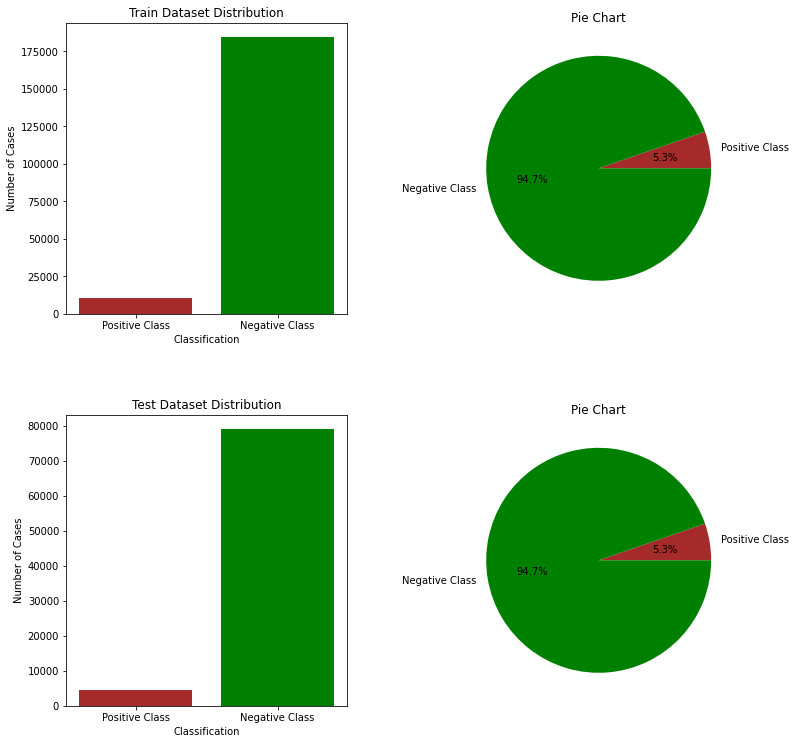

In [8]:
# returns tuple(positive count, negative count): the number of positive class and the number of negative class
def count_pos_neg(data):
    POS_CLASS = 'pos'
    pos_count = 0
    size = len(data) - 1
    for i in range(1, size + 1):
        if data[i][0] == POS_CLASS:
            pos_count += 1
    
    return (pos_count, size - pos_count)

# data visualization
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def overview_visualization(train_data, test_data):
    # count positive/negative classes for train_data/test_data
    train_pos_count, train_neg_count = count_pos_neg(train_data)
    test_pos_count, test_neg_count = count_pos_neg(test_data)

    # plot data
    x = ["Positive Class", "Negative Class"]
    h1 = [train_pos_count, train_neg_count]
    h2 = [test_pos_count, test_neg_count]
    c = ["brown", "green"]

    fig, ((train_ax1, train_ax2), (test_ax1, test_ax2)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
    fig.tight_layout(pad=8.0)

    # train dataset plotting
    train_ax1.bar(x, h1, width=0.8, color=c)
    train_ax2.pie(h1, labels=x, autopct='%1.1f%%', colors=c)
    train_ax1.set(xlabel="Classification", ylabel="Number of Cases")
    train_ax1.set_title("Train Dataset Distribution")
    train_ax2.set_title("Pie Chart")

    # test dataset plotting
    test_ax1.bar(x, h2, width=0.8, color=c)
    test_ax2.pie(h1, labels=x, autopct='%1.1f%%', colors=c)
    test_ax1.set(xlabel="Classification", ylabel="Number of Cases")
    test_ax1.set_title("Test Dataset Distribution")
    test_ax2.set_title("Pie Chart")

    plt.show()


# visualization
overview_visualization(train_data, test_data)





# Pruning Dataset
Prune dataset such that to reduce the percentage of the negative class in the given dataset.

In [9]:
def prune_dataset(data, ratio=3):
    # ratio -> neg_count = ratio * pos_count
    POS_CLASS = 'pos'
    NEG_CLASS = 'neg'

    data = copy.deepcopy(data)
    pruned_dataset = []
    pruned_dataset.append(data[0])
    data.pop(0)

    random.shuffle(data)
    pos_count, neg_count = count_pos_neg(data)
    breakpoint = int(ratio * pos_count)
    count = 0
    for row in data:
        if row[0] == NEG_CLASS:
            if count < breakpoint:
                pruned_dataset.append(row)
                count += 1
        else:
            pruned_dataset.append(row)

    return pruned_dataset

pruned_example_train_data = prune_dataset(train_data)
pruned_example_test_data = prune_dataset(test_data)


# Visualization of Pruned Data
Below shows overview of the data which number of positive case to negative case is in ratio of 1:3. 

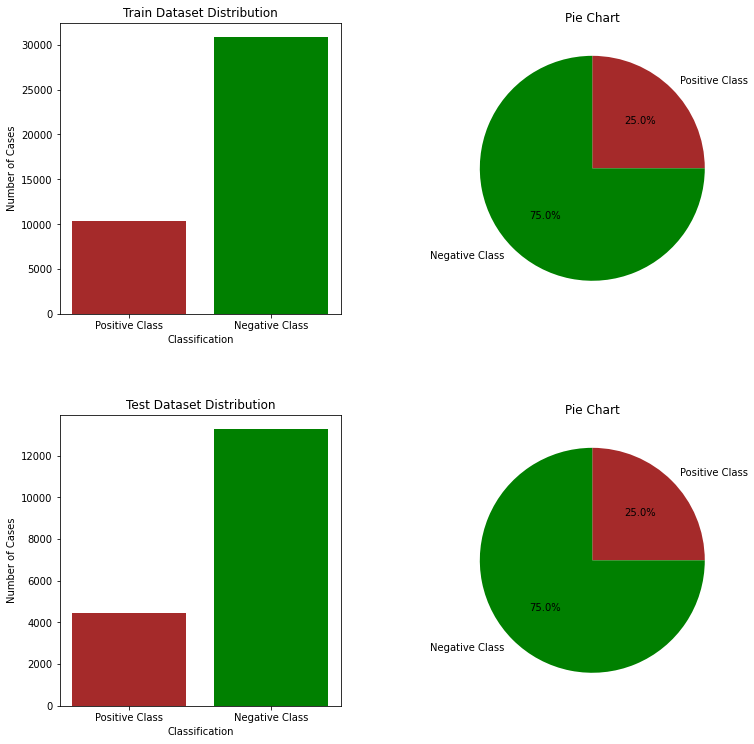

In [10]:
overview_visualization(pruned_example_train_data, pruned_example_test_data)

#Dataloader

The code below reads in the data and represents each COVID-19 individual test as a list of `FeatureVal` named tuples.

In [11]:
from collections import namedtuple
import sys
import math

FeatureVal = namedtuple("FeatureVal", "feature, value")        

class COVID_19_Data:
    def __init__(self, dataset):
        self.data = []
        self.features = set()
        for i, attributes in enumerate(dataset): 
            if i == 0: continue
                   
            for i in range(1,len(attributes)):
                self.features.add(FeatureVal(i, attributes[i]))
            self.data.append(attributes)

Let's see what that looks like:

In [12]:
train = COVID_19_Data(train_data)
test = COVID_19_Data(clean_data)

print("list of possible feature values indexed by position:", sorted(train.features))
print("first training example:", train.data[0])

list of possible feature values indexed by position: [FeatureVal(feature=1, value='f'), FeatureVal(feature=1, value='t'), FeatureVal(feature=2, value='f'), FeatureVal(feature=2, value='t'), FeatureVal(feature=3, value='f'), FeatureVal(feature=3, value='t'), FeatureVal(feature=4, value='f'), FeatureVal(feature=4, value='t'), FeatureVal(feature=5, value='f'), FeatureVal(feature=5, value='t'), FeatureVal(feature=6, value='f'), FeatureVal(feature=6, value='t'), FeatureVal(feature=7, value='f'), FeatureVal(feature=7, value='m'), FeatureVal(feature=8, value='a'), FeatureVal(feature=8, value='c'), FeatureVal(feature=8, value='o')]
first training example: ['neg', 'f', 'f', 'f', 'f', 'f', 'f', 'm', 'o']


We can see that there are many multi-valued attributes in the dataset. To simplify the implementation and visualization process of decision trees, we want to **convert multi-valued attributes into multiple binary attributes** by checking whether a feature has a specific value (see the example below). In this way, the generated decision trees will be **binary** trees.

In [13]:
f = sorted(train.features)[0]

print("Here is an example of how to test whether a feature has a specific value")
print(train.data[100][f.feature] == f.value)
print(train.data[0][f.feature] == f.value)

Here is an example of how to test whether a feature has a specific value
True
True


# ID3 Algorithm


In [14]:
import numpy as np
DtNode = namedtuple("DtNode", "fVal, nPosNeg, gain, left, right")
IG = namedtuple("IG", "gain, npos, nneg")
MaxIG = namedtuple("MaxIG", "fVal, IG")
POS_CLASS = 'pos'
NEG_CLASS = 'neg'
ALPHA = 1 # laplace smoothing

def Entropy(total, npos):
  if total <= 0: return 0
  prob = npos/total
  if prob == 1 or prob == 0:
      return 0
  
  return -prob * np.log2(prob) - (1 - prob) * np.log2((1 - prob))

def InformationGain(data, f):
    """
    Args:
        data:
            Input examples.
        f:
            A selected feature.

    Returns:
        :A (info. gain value, #pos examples, #neg examples) tuple
    """
    info_gain, npos, nneg = 0, 0, 0
    
    num_feature = 0
    num_fpos1 = 0
    num_fpos2 = 0
    total = len(data)

    if total == 0: return IG(0, 0, 0)

    for d in data:
        
        if d[0] == POS_CLASS: npos += 1
        else: nneg += 1

        if d[f.feature] == f.value:
            num_feature += 1
            if d[0] == POS_CLASS: num_fpos1 += 1
        else:
            if d[0] == POS_CLASS: num_fpos2 += 1

    entropy = Entropy(total, npos)
    conditional_entropy = ((num_feature) / (total)) * Entropy(num_feature, num_fpos1) + ((total - num_feature) / (total)) * Entropy((total - num_feature), num_fpos2)

                       
    info_gain = entropy - conditional_entropy
    return IG(info_gain, npos, nneg)

def Classify(tree, instance):
    if tree.left == None and tree.right == None:
        return tree.nPosNeg[0] > tree.nPosNeg[1]
    elif instance[tree.fVal.feature] == tree.fVal.value:
        return Classify(tree.left, instance)
    else:
        return Classify(tree.right, instance)

def Accuracy(tree, data):
    nCorrect = 0
    for d in data:
        if Classify(tree, d) == (d[0] == POS_CLASS):
            nCorrect += 1
    
    print(f"The accuracy is: {float(nCorrect) / len(data)}")

def PrintTree(node, prefix=''):
    if prefix == '':
        print('root:')
    print("%s>next_split=%s\t positive/negative=%s\t info_gain=%s" % (prefix, node.fVal, node.nPosNeg, node.gain))
    if node.left != None:
        print(f"{prefix}{node.fVal}==True:")
        PrintTree(node.left, prefix + '-')
    if node.right != None:
        print(f"{prefix}{node.fVal}==False:")
        PrintTree(node.right, prefix + '-')    
    print()    

def SavePredictions(tree, data, outFile):
    fOut = open(outFile, 'w')
    for d in data:
        if Classify(tree, d):
            fOut.write(f"{POS_CLASS}\n")
        else:
            fOut.write(f"{NEG_CLASS}\n") 

def FindMaxGain(data, fs):
    """
    Args:
        data:
            Input examples.
        fs:
            Input features to find the feature that gives the max information gain.

    Returns:
        :A MaxIG(FeatureVal(feature, value), IG(gain, npos, nneg)) tuple
    """
    if len(data) == 0: return (FeatureVal(0, 0), IG(0,0,0))
    fs = sorted(fs)
    info_gains = {}
    max_info_gain = (FeatureVal(None, 0),0) # (feature, gain)
    for f in fs:
        if f.feature not in info_gains:
            info_gains[f.feature] = IG(0, 0, 0)
        else:
            info_gain = InformationGain(data, f)
            if info_gains[f.feature].gain <= info_gain.gain:
                info_gains[f.feature] = info_gain
      
        if max_info_gain[1] < info_gains[f.feature].gain:
            max_info_gain = (f, info_gains[f.feature].gain)
   
    # When there is no maximum, case of leaf then no feature to be selected. Just count npos and nneg  and return
    default_feature = fs[0].feature # fs[0].feature as a default feature
    if max_info_gain[0].feature is None:
        return MaxIG(FeatureVal(None, 0), info_gains[default_feature])

    return MaxIG(max_info_gain[0], info_gains[max_info_gain[0].feature]) # return (FeatureVal("feature", "value"), information_gain(gain, npos, nneg))

def PartitionData(data, f):
    """
    Args:
        data:
            Input examples.
        f:
            Input feature to be partitioned.

    Returns:
        :A [left partitioned data, right partitioned data] list (left: data that has the feature-attribute, right: data without the feature attribute).
    """
    left_partition, right_partition = [], []
    for d in data:
        if d[f.feature] == f.value: left_partition.append(d)
        else: right_partition.append(d)
    
    return [left_partition, right_partition]

def PartitionFeatures(fs, feature):
    """
    Args:
        fs:
            Input features.
        feature:
            Input feature to be filtered(or removed).

    Returns:
        :A  [left partitioned features, right partitioned features] list.
    """
    left_partition = []
    right_partition = []
    for f in fs:
        if f.feature == feature.feature and f.value == feature.value:
            left_partition.append(f)
            continue
        if f.feature == feature.feature and f.value != feature.value:
            right_partition.append(f)
            continue
        
        left_partition.append(f)
        right_partition.append(f)

    return [sorted(left_partition), sorted(right_partition)]

def ID3(data, features, MIN_GAIN=0.1, loc="ROOT"):
    #print(loc)
    """
    Args:
        data:
            Input examples.
        features:
            Input features sets.
        MIN_GAIN:
            A threhold for informaiton gain to make further splits.

    Returns:
        :A built decision tree (using DtNode defined above)
    """

    max_info_gain = FindMaxGain(data, features) # MaxIG(FeatureVal(feature, value), IG(gain, npos, nneg))
    node = DtNode(max_info_gain.fVal, (max_info_gain.IG.npos, max_info_gain.IG.nneg), max_info_gain.IG.gain, None, None)

    # Base Case
    if node.nPosNeg[0] == 0 or node.nPosNeg[1] == 0:
        # DEBUG #
        #DEBUG(node, data, None, None)
        return node
        
    if node.nPosNeg[0] == node.nPosNeg[1]:
        # DEBUG #
        #DEBUG(node, data, None, None)
        return node

    if node.gain < MIN_GAIN:
        # DEBUG #
        #DEBUG(node, data, None, None)
        return node

    # Partioning and Filtering
    left_partitioned_data, right_partitioned_data = PartitionData(data, node.fVal)
    left_partitioned_features, right_partitioned_features = PartitionFeatures(features, node.fVal)
    
    
    # DEBUG #
    #DEBUG(node, data, [left_partitioned_data, right_partitioned_data], [left_partitioned_features, right_partitioned_features])

    return DtNode(node.fVal, node.nPosNeg, node.gain, ID3(left_partitioned_data, left_partitioned_features, MIN_GAIN, 'Left'), ID3(right_partitioned_data, right_partitioned_features, MIN_GAIN, 'Right'))


def DEBUG(node, data,  partitioned_data, partitioned_features):
    """
    debugging purpose
    prints out data
    """

    if partitioned_data is not None and partitioned_features is not None:

        left_partitioned_data, right_partitioned_data = partitioned_data
        left_partitioned_features, right_partitioned_features = partitioned_features
        cnt1 = 0
        for d in left_partitioned_data:
            if d[0] == POS_CLASS:
                cnt1 += 1
        
        cnt2 = 0
        for d in right_partitioned_data:
            if d[0] == POS_CLASS:
                cnt2 += 1

    print("feature: ", node.fVal.feature, "value: ", node.fVal.value, "information gain: ", node.gain)
    
    if partitioned_data is not None and partitioned_features is not None:
        print(left_partitioned_features)
        print(right_partitioned_features)

    print("####")
    print("data count: ", len(data))
    print(data)
    print("nposneg: ", node.nPosNeg)
    print("####")

    if partitioned_data is not None and partitioned_features is not None:
        print("left data count: ", len(left_partitioned_data))
        print("right data count: ", len(right_partitioned_data))
        print("left data pos count: ", cnt1)
        print("right data neg count: ", cnt2)

    print()
    return

# Test and Evaluation
Tested upon dataset of following,

1. Original Dataset (5.5% Positive by 94.5% Negative) : train_data & test_data
2. Pruned Dataset (50% Positive by 50% Negative) : pruned_train_data1 & pruned_test_data1
3. Pruned Dataset (25% Positive by 75% Negative) : pruned_train_data2 & pruned_test_data2
4. Pruned Dataset (10% Positive by 90% Negative) : pruned_train_data3 & pruned_test_data3


# Data Overview : Original Dataset (5.5% Positive by 94.5% Negative)

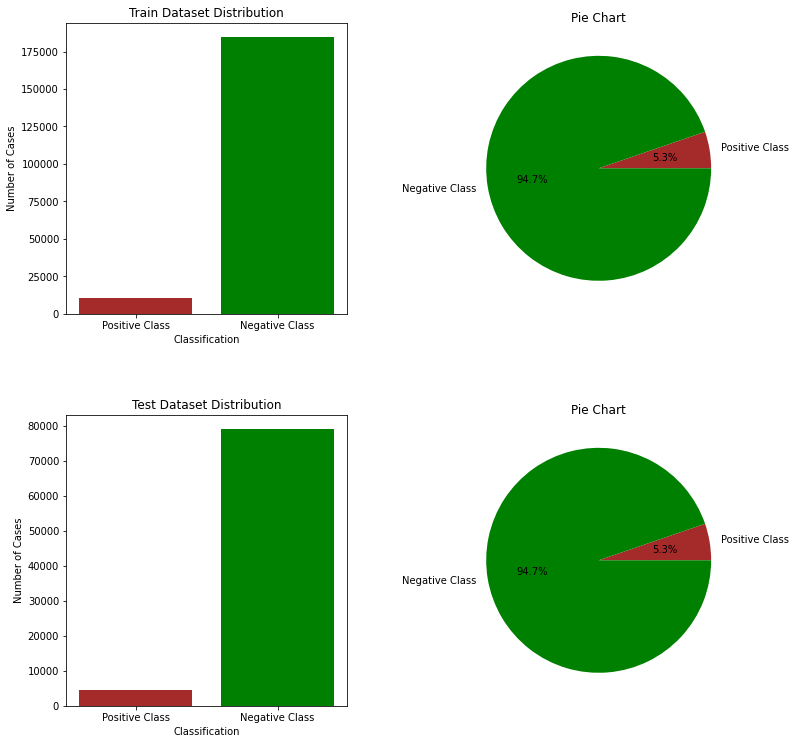

In [ ]:
overview_visualization(train_data, test_data)

# Evaluation

In [15]:
train1 = COVID_19_Data(train_data)
test1 = COVID_19_Data(test_data)

dTree1 = ID3(train1.data, train1.features, MIN_GAIN=0.01)

#PrintTree(dTree)

print("-train1 data-")
Accuracy(dTree1, train1.data)
print("-test1 data-")
Accuracy(dTree1, test1.data)

-train1 data-
The accuracy is: 0.9663203409975819
-test1 data-
The accuracy is: 0.9664694280078896


# Data Overview : Pruned Dataset (50% Positive by 50% Negative)

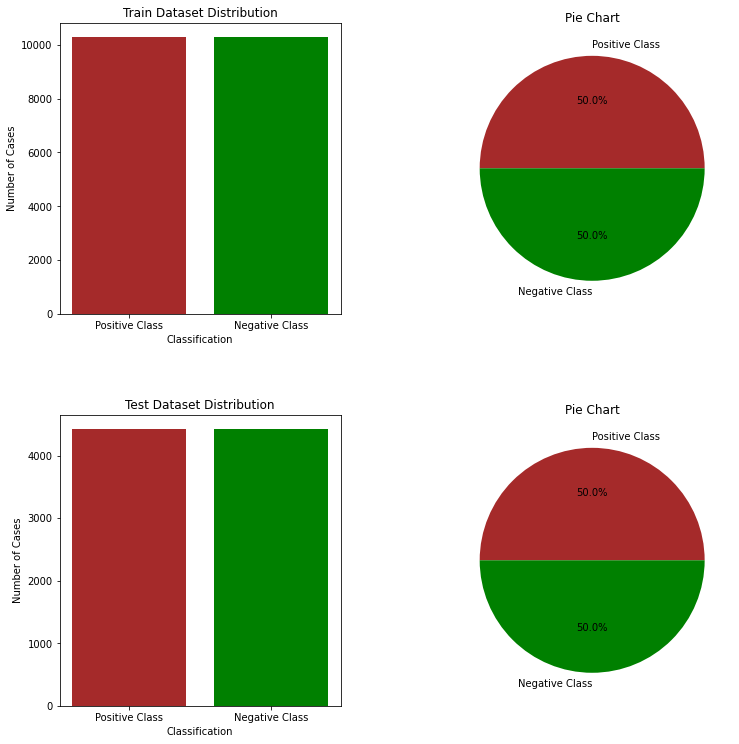

In [16]:
pruned_train_data1 = prune_dataset(train_data, ratio=1)
pruned_test_data1 = prune_dataset(test_data,ratio=1)
overview_visualization(pruned_train_data1, pruned_test_data1)

# Evaluation

In [17]:
train2 = COVID_19_Data(pruned_train_data1)
test2 = COVID_19_Data(pruned_test_data1)

dTree2 = ID3(train2.data, train2.features, MIN_GAIN=0.01)

#PrintTree(dTree)

print("-train2 data-")
Accuracy(dTree2, train2.data)
print("-test2 data-")
Accuracy(dTree2, test2.data)


-train2 data-
The accuracy is: 0.5
-test2 data-
The accuracy is: 0.5


# Data Overview : Pruned Dataset (25% Positive by 75% Negative)

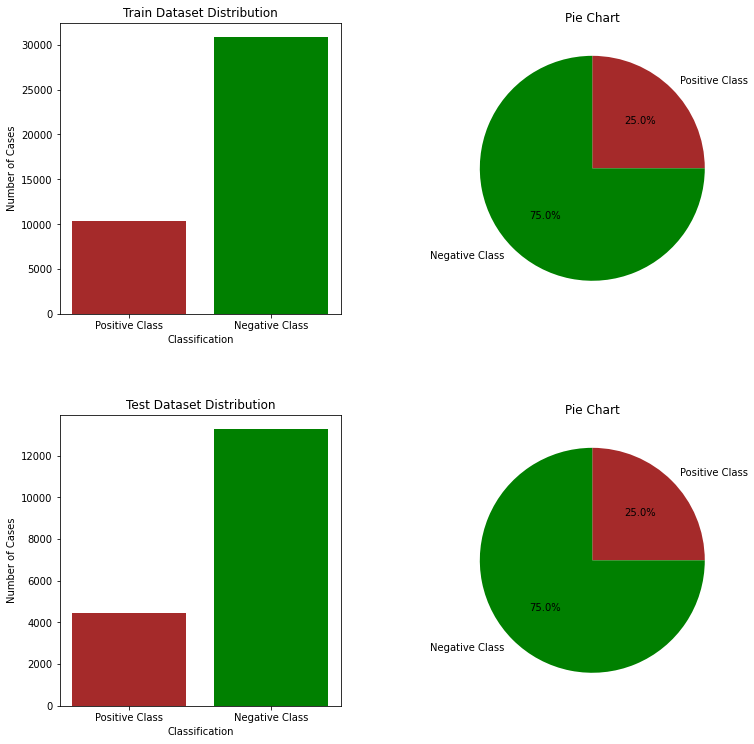

In [18]:
pruned_train_data2 = prune_dataset(train_data, ratio=3)
pruned_test_data2 = prune_dataset(test_data,ratio=3)
overview_visualization(pruned_train_data2, pruned_test_data2)

# Evaluation


In [19]:
train3 = COVID_19_Data(pruned_train_data2)
test3 = COVID_19_Data(pruned_test_data2)

dTree3 = ID3(train3.data, train3.features, MIN_GAIN=0.01)

#PrintTree(dTree)

print("-train3 data-")
Accuracy(dTree3, train3.data)
print("-test3 data-")
Accuracy(dTree3, test3.data)

-train3 data-
The accuracy is: 0.8921601941747572
-test3 data-
The accuracy is: 0.8884624068638519


# Data Overview : Pruned Dataset (10% Positive by 90% Negative)

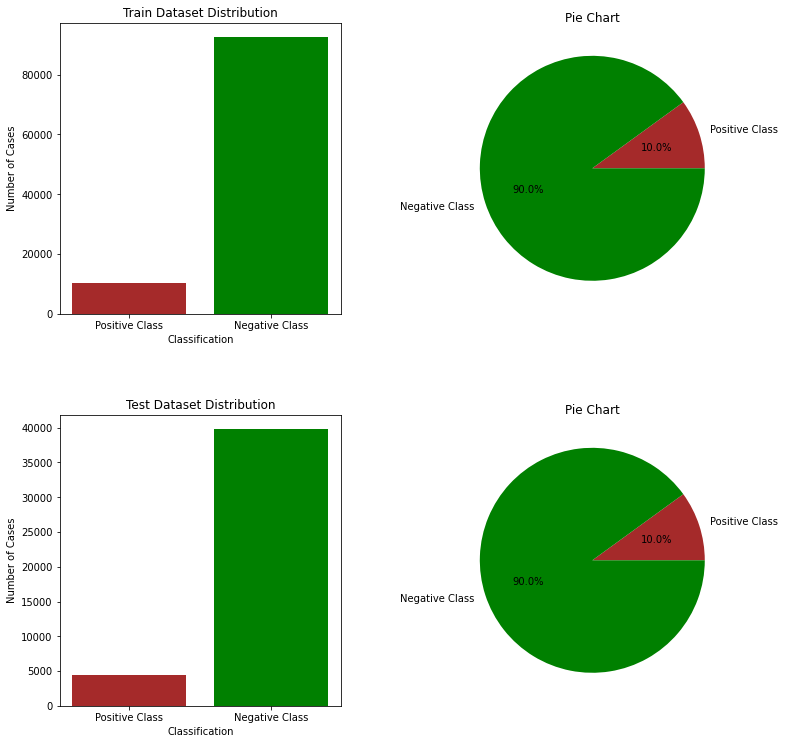

In [20]:
pruned_train_data3 = prune_dataset(train_data, ratio=9)
pruned_test_data3 = prune_dataset(test_data,ratio=9)
overview_visualization(pruned_train_data3, pruned_test_data3)

# Evaluation

In [21]:
train4 = COVID_19_Data(pruned_train_data3)
test4 = COVID_19_Data(pruned_test_data3)

dTree4 = ID3(train4.data, train4.features, MIN_GAIN=0.01)

#PrintTree(dTree)

print("-train4 data-")
Accuracy(dTree4, train4.data)
print("-test4 data-")
Accuracy(dTree4, test4.data)

-train4 data-
The accuracy is: 0.9482621359223301
-test4 data-
The accuracy is: 0.9466019417475728


# Test Over Dataset having Positive or Negative Case Only
Test conducted over dataset consisting only the positive/negative class with dataset size of 2000.

In [25]:
def extract_positive_data(dataset, size=4000):
    POS_CLASS = 'pos'
    positive_dataset = []


    count = 0
    for i, row in enumerate(dataset):
        if i == 0: continue
        if count >= size: break
        if row[0] == POS_CLASS:
            positive_dataset.append(row)
            count += 1
    return positive_dataset

def extract_negative_data(dataset, size=4000):
    NEG_CLASS = 'neg'
    negative_dataset = []
    

    count = 0
    for i, row in enumerate(dataset):
        if i == 0: continue
        if count >= size: break
        if row[0] == NEG_CLASS:
            negative_dataset.append(row)
            count += 1
    return negative_dataset

sample_positive_data = extract_positive_data(test_data, 2000)
sample_negative_data = extract_negative_data(test_data, 2000)
print("1. extracting positive cases")
for i, row in enumerate(sample_positive_data):
    if i == 20: break
    print(row)
print("2. extracting negative cases")
for i, row in enumerate(sample_negative_data):
    if i == 20: break
    print(row)



1. extracting positive cases
['pos', 'f', 'f', 'f', 'f', 'f', 'f', 'm', 'o']
['pos', 'f', 'f', 'f', 'f', 'f', 'f', 'm', 'o']
['pos', 'f', 'f', 'f', 't', 'f', 'f', 'f', 'c']
['pos', 'f', 't', 'f', 'f', 'f', 'f', 'm', 'o']
['pos', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'c']
['pos', 't', 't', 't', 'f', 't', 'f', 'm', 'c']
['pos', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'o']
['pos', 'f', 't', 'f', 'f', 'f', 'f', 'm', 'c']
['pos', 't', 'f', 'f', 'f', 'f', 'f', 'm', 'o']
['pos', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'o']
['pos', 'f', 't', 'f', 'f', 'f', 't', 'm', 'c']
['pos', 'f', 'f', 'f', 't', 't', 'f', 'f', 'c']
['pos', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'c']
['pos', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'o']
['pos', 'f', 'f', 'f', 'f', 'f', 'f', 'm', 'c']
['pos', 't', 't', 'f', 'f', 'f', 'f', 'm', 'c']
['pos', 'f', 't', 't', 'f', 't', 'f', 'm', 'o']
['pos', 't', 'f', 'f', 'f', 't', 'f', 'f', 'c']
['pos', 't', 't', 'f', 'f', 'f', 'f', 'f', 'o']
['pos', 't', 'f', 'f', 't', 'f', 't', 'm', 'a']
2. extracti

In [26]:
# Overall Test Result #

# test1
print("# Test over model 1: Original Dataset")
train1_positive_data = extract_positive_data(train_data)
train1_negative_data = extract_negative_data(train_data)
test1_positive_data = extract_positive_data(test_data)
test1_negative_data = extract_negative_data(test_data)

print("-train(overall) data-")
Accuracy(dTree1, train1.data)
print("-train(positive) data-")
Accuracy(dTree1, train1_positive_data)
print("-train(negative) data-")
Accuracy(dTree1, train1_negative_data)

print("-test(overall) data-")
Accuracy(dTree1, test1.data)
print("-test(positive) data-")
Accuracy(dTree1, test1_positive_data)
print("-test(negative) data-")
Accuracy(dTree1, test1_negative_data)

print()

# test2
print("# Test over model 2: 50% Positive by 50% Negative")
train2_positive_data = extract_positive_data(pruned_train_data1)
train2_negative_data = extract_negative_data(pruned_train_data1)
test2_positive_data = extract_positive_data(pruned_test_data1)
test2_negative_data = extract_negative_data(pruned_test_data1)

print("-train(overall) data-")
Accuracy(dTree2, train2.data)
print("-train(positive) data-")
Accuracy(dTree2, train2_positive_data)
print("-train(negative) data-")
Accuracy(dTree2, train2_negative_data)

print("-test(overall) data-")
Accuracy(dTree2, test2.data)
print("-test(positive) data-")
Accuracy(dTree2, test2_positive_data)
print("-test(negative) data-")
Accuracy(dTree2, test2_negative_data)

print()

# test3
print("# Test over model 3: 25% Positive by 75% Negative")
train3_positive_data = extract_positive_data(pruned_train_data2)
train3_negative_data = extract_negative_data(pruned_train_data2)
test3_positive_data = extract_positive_data(pruned_test_data2)
test3_negative_data = extract_negative_data(pruned_test_data2)

print("-train(overall) data-")
Accuracy(dTree3, train3.data)
print("-train(positive) data-")
Accuracy(dTree3, train3_positive_data)
print("-train(negative) data-")
Accuracy(dTree3, train3_negative_data)

print("-test(overall) data-")
Accuracy(dTree3, test3.data)
print("-test(positive) data-")
Accuracy(dTree3, test3_positive_data)
print("-test(negative) data-")
Accuracy(dTree3, test3_negative_data)

print()

# test4
print("# Test over model 4: 10% Positive by 90% Negative")
train4_positive_data = extract_positive_data(pruned_train_data3)
train4_negative_data = extract_negative_data(pruned_train_data3)
test4_positive_data = extract_positive_data(pruned_test_data3)
test4_negative_data = extract_negative_data(pruned_test_data3)

print("-train(overall) data-")
Accuracy(dTree4, train4.data)
print("-train(positive) data-")
Accuracy(dTree4, train4_positive_data)
print("-train(negative) data-")
Accuracy(dTree4, train4_negative_data)

print("-test(overall) data-")
Accuracy(dTree4, test4.data)
print("-test(positive) data-")
Accuracy(dTree4, test4_positive_data)
print("-test(negative) data-")
Accuracy(dTree4, test4_negative_data)

# Test over model 1: Original Dataset
-train(overall) data-
The accuracy is: 0.9663203409975819
-train(positive) data-
The accuracy is: 0.49675
-train(negative) data-
The accuracy is: 0.99425
-test(overall) data-
The accuracy is: 0.9664694280078896
-test(positive) data-
The accuracy is: 0.5065
-test(negative) data-
The accuracy is: 0.9915

# Test over model 2: 50% Positive by 50% Negative
-train(overall) data-
The accuracy is: 0.5
-train(positive) data-
The accuracy is: 0.0
-train(negative) data-
The accuracy is: 1.0
-test(overall) data-
The accuracy is: 0.5
-test(positive) data-
The accuracy is: 0.0
-test(negative) data-
The accuracy is: 1.0

# Test over model 3: 25% Positive by 75% Negative
-train(overall) data-
The accuracy is: 0.8921601941747572
-train(positive) data-
The accuracy is: 0.652
-train(negative) data-
The accuracy is: 0.97225
-test(overall) data-
The accuracy is: 0.8884624068638519
-test(positive) data-
The accuracy is: 0.65125
-test(negative) data-
The accuracy is: 0.9

# Model Evaluation Metrics
 As dataset is leaned largely towards the negative test results, it is necessary to check how reliable the model predicition is other than the accuracy of the prediction.
Evaluation metrics are as follows;

Predcision = number_of_true_pos/(number_of_true_pos + number_of_false_pos)

Recall = number_of_true_pos/(number_of_true_pos + number_of_false_neg)

F-1 = (2 x recall x precision)/(recall + precision)

In [49]:
def measure_scores(tree,data):
    # returns (f-1, precision, recall)
    f1 = None
    # recall = (# True Positive)/(# True Positive + # of False Negative)
    # precision = (# True Positive)/(# True Positive + # of False Positive)
    # f1_measure = (2*recall*precision)/(recall + precision)
    number_of_true_pos = 0
    number_of_false_neg = 0
    number_of_false_pos = 0

    for d in data:
        pred = Classify(tree, d)
        if (pred == True):
          # true positive
          number_of_true_pos += 1
        if (d[0] != POS_CLASS) and (pred == True):
          # false positive
          number_of_false_pos += 1
        if (d[0] == POS_CLASS) and (pred == False):
          # false negative
          number_of_false_neg += 1
    #print(f'##########{number_of_true_pos}###########')
    #print(f'##########{number_of_false_pos}###########')
    #print(f'##########{number_of_false_neg}###########')
    # recall
    recall = number_of_true_pos/(number_of_true_pos + number_of_false_neg) if (number_of_true_pos + number_of_false_neg) > 0 else 0
    # precision
    precision = number_of_true_pos/(number_of_true_pos + number_of_false_pos) if (number_of_true_pos + number_of_false_pos) > 0 else 0
    # f1 measure
    f1 = (2*recall*precision)/(recall + precision) if (recall + precision) > 0 else 0
    ## YOUR CODE ENDS HERE ##
    return (f1, precision, recall)
  
model1_scores = measure_scores(dTree1, test1.data)
model2_scores = measure_scores(dTree2, test2.data)
model3_scores = measure_scores(dTree3, test3.data)
print(f"model 1 (original dataset): F-1 Score = {model1_scores[0]}, Precision = {model1_scores[1]}, Recall = {model1_scores[2]}")
print(f"model 2 (1:1): F-1 Score = {model2_scores[0]}, Precision = {model2_scores[1]}, Recall = {model2_scores[2]}")
print(f"model 3 (1:3): F-1 Score = {model3_scores[0]}, Precision = {model3_scores[1]}, Recall = {model3_scores[2]}")


model 1 (original dataset): F-1 Score = 0.6684789032029311, Precision = 0.8244897959183674, Recall = 0.562114887696283
model 2 (1:1): F-1 Score = 0, Precision = 0, Recall = 0.0
model 3 (1:3): F-1 Score = 0.7698579082226882, Precision = 0.8858214955775932, Recall = 0.6807415036045315
